In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

import os
print(os.listdir("/content"))

%matplotlib inline

['.config', 'Zoo.csv', 'sample_data']


In [11]:
animal = pd.read_csv('/content/Zoo.csv')
animal.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [5]:
animal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
animal.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [12]:
duplicates = animal.animal_name.value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal_name, dtype: int64

In [13]:
frog = animal.loc[animal['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [14]:
animal['animal_name'][(animal.venomous == 1 )& (animal.animal_name == 'frog')] = "frog2"

In [15]:
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow" ) for i in animal.hair]
unique_color = list(set(color_list))
unique_color

['blue', 'red']

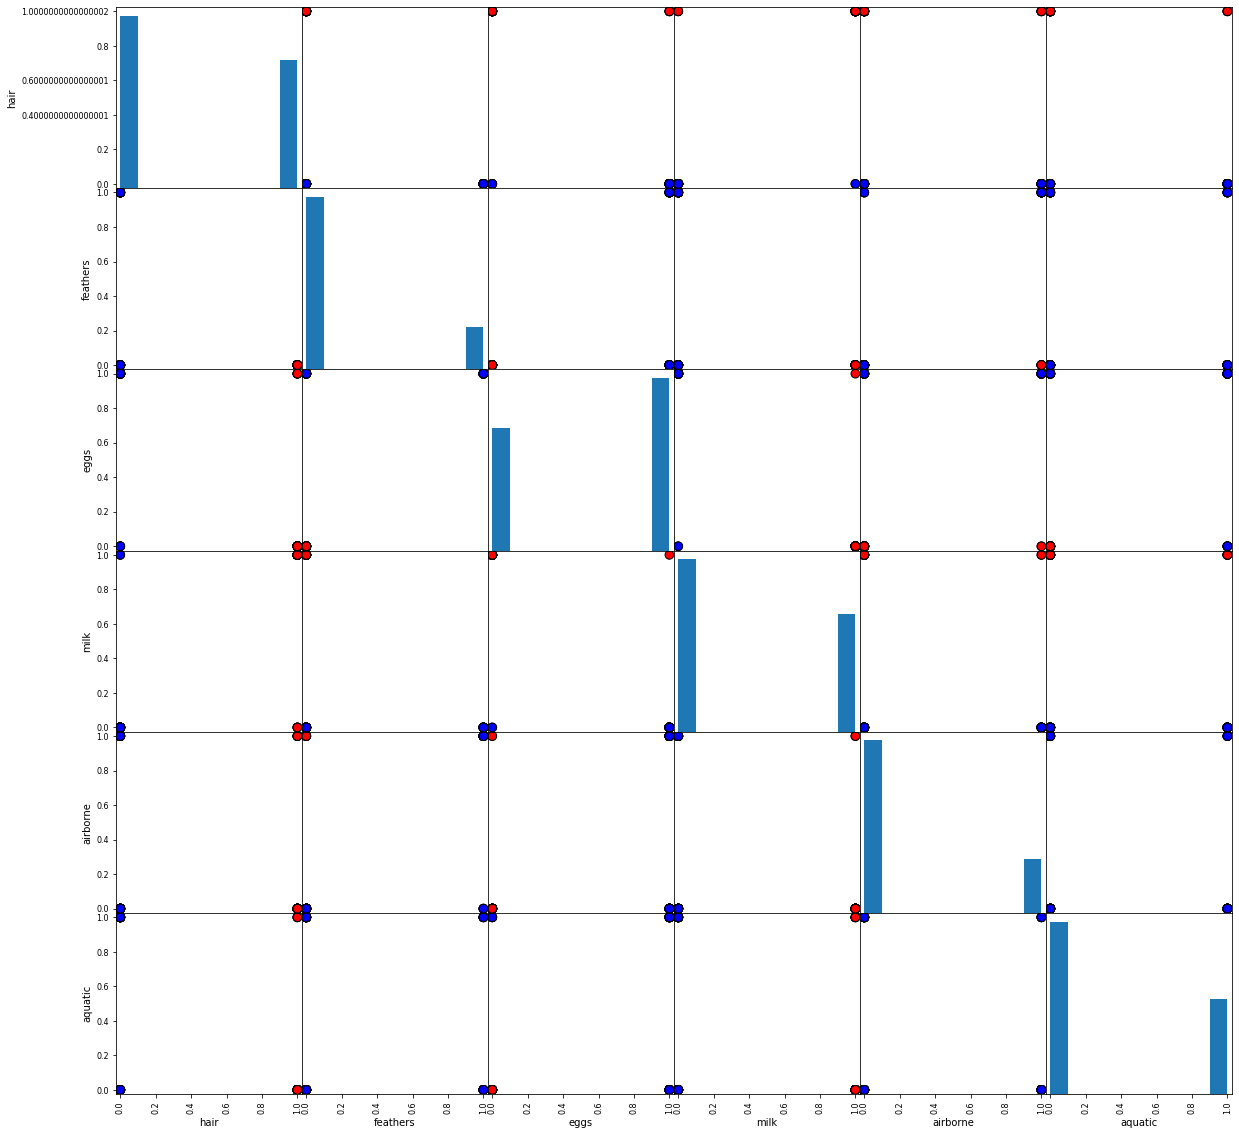

In [16]:
pd.plotting.scatter_matrix(animal.iloc[:,:7],
                                       c=color_list,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

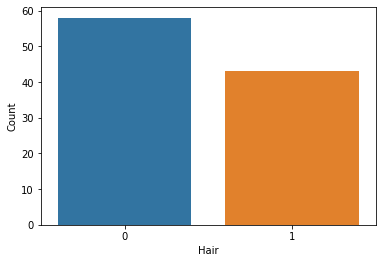

0    58
1    43
Name: hair, dtype: int64

In [17]:
sns.countplot(x="hair", data=animal)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
animal.loc[:,'hair'].value_counts()

In [19]:
from sklearn.model_selection import train_test_split
X = animal.iloc[:,1:17]
y = animal.iloc[:,17]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
# Declare the model
clf = KNeighborsClassifier(n_neighbors=3)

# Train the model
clf.fit(X_train, y_train)
y_pred_KNeighborsClassifier = clf.predict(X_test)

scrs = []



In [22]:
from sklearn.model_selection import cross_val_score


cv_scores = [] # store cross vadidation score of all the algorithms.

score_knn=cross_val_score(clf, X,y, cv=10)

print("K-Nearest Neighbors Accuracy: %0.2f (+/- %0.2f) with k value equals to 3" % (score_knn.mean(), score_knn.std() * 2))

K-Nearest Neighbors Accuracy: 0.95 (+/- 0.10) with k value equals to 3


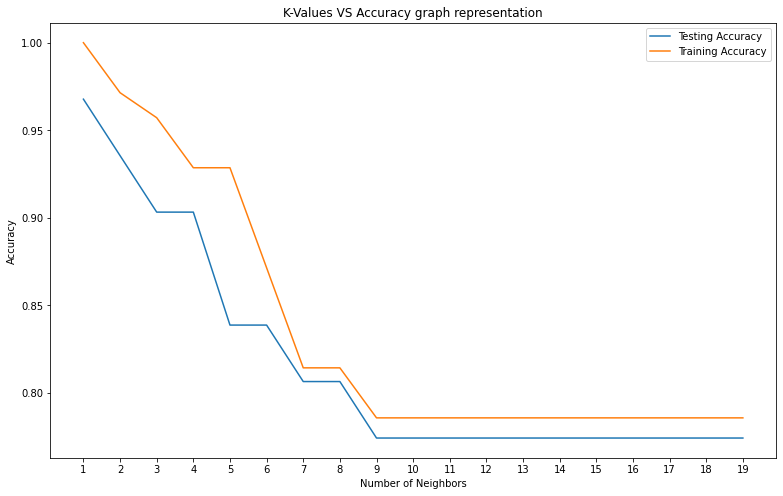

Best accuracy is 0.967741935483871 with K = 1


In [23]:
k_values = np.arange(1,20)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 20(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))


plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('K-Values VS Accuracy graph representation')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)

plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

cv_scores.append(np.max(test_accuracy))